In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
import numpy as np

In [3]:
# plot jth image
def plot_jimage(j):
    plt.title('The jth image is a {label}'.format(label=int(y[j])))
    plt.imshow(X[j].reshape((28, 28)), cmap='gray')
    plt.show()

In [27]:
def train_pkernal(X_train, y_train, k, parameters, *args):
    if args:
        if args[0] > 0:
            svm_ = svm.SVC(kernel=k, degree=args, random_state=666)
        else:
            svm_ = svm.SVC(kernel=k, gamma=args, random_state=666)
    else:
        svm_ = svm.SVC(kernel=k, random_state=666)
   
    clf = GridSearchCV(svm_, parameters, scoring="accuracy", cv=fold, n_jobs=-1)
    clf.fit(X_train, y_train)
    Pe_1 = 1 - clf.cv_results_["mean_test_score"]
    
    
    return clf.best_params_["C"], clf.best_params_["gamma"], Pe_1

In [14]:
gamma_grid

array([1.00000000e-09, 1.77827941e-08, 3.16227766e-07, 5.62341325e-06,
       1.00000000e-04])

In [23]:
def test_error(X_test, y_test, k, *args, **kwargs):
    if args:
        svm_ = svm.SVC(kernel=k, degree=args, random_state=666)
    else:
        svm_ = svm.SVC(kernel=k, C=kwargs['C'], gamma=kwargs['gamma'], random_state=666)
        
    svm_.fit(X_test, y_test)
    test_error = 1 - svm_.score(X_test, y_test)
    
    return test_error

In [24]:
def plot_c(C_grid, Pe_1, k, *args):
    plt.figure(1, figsize=(6, 8))
    plt.ylabel("validation error")
    plt.xlabel("C")
    if args:
        plt.title(f"validation error with respect to C when kernal = {k} degree={args}")
    plt.title(f"validation error with respect to C when kernal = {k}")
    plt.semilogx(C_grid, Pe_1, marker='o',label="Mean test error with 4-fold CV")
    plt.legend()
    plt.show()

In [7]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_, y_ = X.iloc[:7000,], y[:7000,]
X_.shape, y_.shape # ((7000, 784), (7000,))
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=4/7, random_state=42)

##### __(a)__ : For each kernel, report the best value of C (draw a figure where y-axis is the validation error, while x-axis is the value of C), the test error corresponding to this best C (do not forget to retrain on the whole training dataset after selecting the best value of C).

The error with best C is :0.03 when degree is: 1


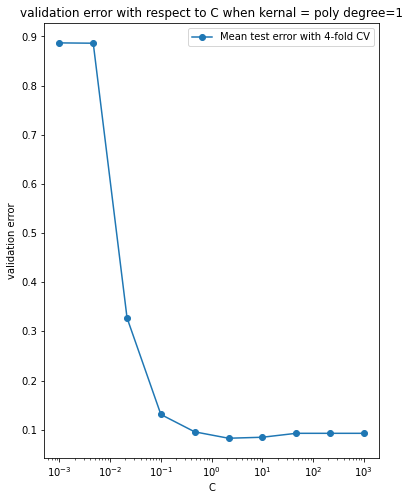

The error with best C is :0.00 when degree is: 2


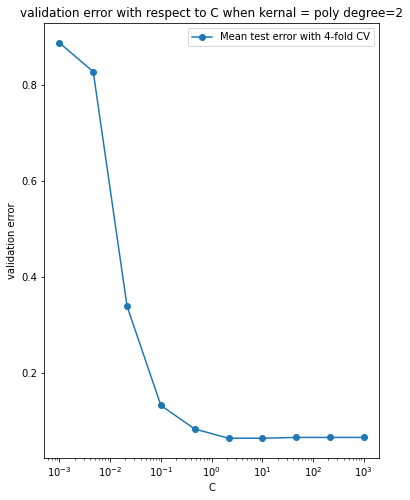

In [67]:
fold = 4
C_grid_a = np.logspace(-3, 3, 10)
parameters_a = {"C": C_grid_a}

for i in [1,2]:
    bestC, _, Pe = train_pkernal(X_train, y_train, "poly", parameters_a, i)
    best_test_error = test_error(X_test, y_test, "poly", best_c=bestC , i)
    print(f"The error with best C is :{best_test_error:.2f} when degree is: {i}")
    plot_c(C_grid_a, Pe, "poly", i)

In [29]:
fold = 4
C_grid_b = np.logspace(-3, 3, 5)
gamma_grid = np.logspace(-9, -4, 2)

# find best gamma
parameters_b = {'C': C_grid_b, 'gamma': gamma_grid}
_, bestG, _ = train_pkernal(X_train, y_train, "rbf", parameters_b)

# find C validation error with best gamma
parameters_b2 = {'C': C_grid_b}
bestC2, _, Pe2 = train_pkernal(X_train, y_train, "rbf", parameters_b2, bestG)
best = {"C":bestC2, "gamma":bestG}
best_test_error2 = test_error(X_test, y_test, "rbf", **best)
print(f"The error with best C is :{best_test_error2:.2f} ")
plot_c(C_grid_b, Pe2, "rbf")

In [32]:
def test(*args):
    for i in args:
        print(type(i))

In [33]:
test(1,3,"a")

<class 'int'>
<class 'int'>
<class 'str'>
